<a href="https://colab.research.google.com/github/dudwn98/KPU2020JOLJAK-1/blob/master/%5BColab%5DPart3_02~03_Preprocess_01~02_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EC%A4%80%EB%B9%84%ED%95%98%EA%B8%B0~%EC%9D%B4%EB%AF%B8%EC%A7%80_%EB%B6%84%EC%84%9D_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
from glob import glob

import numpy as np

import tensorflow as tf
from PIL import Image

import matplotlib.pyplot as plt
%matplotlib inline

In [28]:
!unzip -qq /content/drive/My\ Drive/'test'/'mnist_png.zip'


replace mnist_png/testing/0/10.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [30]:
os.getcwd()

'/content'

In [32]:
os.listdir('mnist_png/training/0/')

['33464.png',
 '20681.png',
 '46430.png',
 '39801.png',
 '53189.png',
 '37917.png',
 '12741.png',
 '17725.png',
 '11683.png',
 '6496.png',
 '10348.png',
 '8019.png',
 '6502.png',
 '2327.png',
 '7062.png',
 '54967.png',
 '55745.png',
 '55259.png',
 '53678.png',
 '36569.png',
 '38057.png',
 '24367.png',
 '33066.png',
 '14325.png',
 '5932.png',
 '57882.png',
 '52921.png',
 '38574.png',
 '15795.png',
 '50511.png',
 '56984.png',
 '16749.png',
 '95.png',
 '2944.png',
 '9544.png',
 '25987.png',
 '56857.png',
 '57115.png',
 '11973.png',
 '38662.png',
 '54512.png',
 '36874.png',
 '21628.png',
 '17349.png',
 '57629.png',
 '15344.png',
 '46617.png',
 '50070.png',
 '18022.png',
 '7462.png',
 '9742.png',
 '32867.png',
 '26184.png',
 '42559.png',
 '49695.png',
 '46963.png',
 '14430.png',
 '30827.png',
 '29474.png',
 '29034.png',
 '52599.png',
 '47447.png',
 '51024.png',
 '48815.png',
 '13135.png',
 '5144.png',
 '8349.png',
 '36894.png',
 '44326.png',
 '14722.png',
 '11848.png',
 '15311.png',
 '34867

In [26]:
len(os.listdir('/content/mnist_png/training'))

10

In [33]:
glob('/content/mnist_png/training/*/*.png') #경로가 포함된 파일 이름을 리스트로 가져옴. 레이블 0에 속한 모든 이미지를 불러옵니다.

['/content/mnist_png/training/3/29304.png',
 '/content/mnist_png/training/3/33583.png',
 '/content/mnist_png/training/3/34407.png',
 '/content/mnist_png/training/3/8077.png',
 '/content/mnist_png/training/3/20356.png',
 '/content/mnist_png/training/3/59808.png',
 '/content/mnist_png/training/3/18343.png',
 '/content/mnist_png/training/3/7980.png',
 '/content/mnist_png/training/3/42210.png',
 '/content/mnist_png/training/3/54524.png',
 '/content/mnist_png/training/3/38245.png',
 '/content/mnist_png/training/3/37163.png',
 '/content/mnist_png/training/3/51934.png',
 '/content/mnist_png/training/3/33590.png',
 '/content/mnist_png/training/3/50726.png',
 '/content/mnist_png/training/3/31044.png',
 '/content/mnist_png/training/3/35162.png',
 '/content/mnist_png/training/3/19950.png',
 '/content/mnist_png/training/3/10031.png',
 '/content/mnist_png/training/3/27541.png',
 '/content/mnist_png/training/3/53252.png',
 '/content/mnist_png/training/3/1631.png',
 '/content/mnist_png/training/3/571

In [34]:
data_paths = glob('/content/mnist_png/training/*/*.png')

In [36]:
data_paths[-1] # 잘 불러왔는지 확인

'/content/mnist_png/training/6/32143.png'

In [35]:
len(data_paths)

60000

In [37]:
path = data_paths[0]  # 예제로 사용할 데이터 추출

In [38]:
path

'/content/mnist_png/training/3/29304.png'

# 데이터 분석 (MNIST)

In [39]:
os.listdir('/content/mnist_png/training')

['3', '7', '4', '5', '2', '8', '0', '9', '1', '6']

In [41]:
len(os.listdir('/content/mnist_png/training'))

10

In [43]:
label_nums = os.listdir('/content/mnist_png/training')
label_nums

['3', '7', '4', '5', '2', '8', '0', '9', '1', '6']

Label 0의 데이터 갯수 확인

In [44]:
len(label_nums)

10

## **데이터별 갯수 비교**

In [45]:
lbl_n = label_nums[0]
'/content/mnist_png/training/'+lbl_n

'/content/mnist_png/training/3'

In [48]:
nums_dataset = []

for lbl_n in label_nums:
    data_per_class = os.listdir('/content/mnist_png/training/' + lbl_n)
    nums_dataset.append(len(data_per_class))

In [50]:
label_nums

['3', '7', '4', '5', '2', '8', '0', '9', '1', '6']

In [49]:
nums_dataset

[6131, 6265, 5842, 5421, 5958, 5851, 5923, 5949, 6742, 5918]

Text(0.5, 1.0, 'Number of Dataset per class')

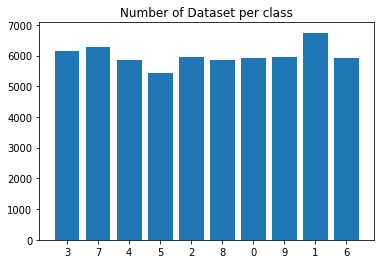

In [51]:
plt.bar(label_nums, nums_dataset)
plt.title('Number of Dataset per class')

# Pillow로 열기

In [52]:
path # 정렬하기 전에 추출된 예시데이터이기 때문에 강의에서는 0/1.PNG 이지만, 여기서는 임의추출된 3/29304.PNG  .- 실습에 문제 없음.

'/content/mnist_png/training/3/29304.png'

In [54]:
image_pil = Image.open(path)
image = np.array(image_pil)

In [55]:
image.shape

(28, 28)

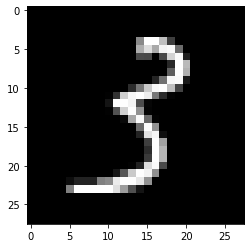

In [56]:
plt.imshow(image, 'gray')
plt.show()

# TensorFlow로 열기

In [58]:
gfile = tf.io.read_file(path)
image = tf.io.decode_image(gfile)

In [59]:
image.shape

TensorShape([28, 28, 1])

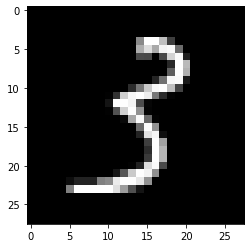

In [60]:
plt.imshow(image[:,:, 0], 'gray')
plt.show()

# Label 얻기

In [61]:
path

'/content/mnist_png/training/3/29304.png'

In [65]:
path.split('/')

['', 'content', 'mnist_png', 'training', '3', '29304.png']

In [68]:
label = path.split('/')[-2]

In [69]:
label

'3'

In [70]:
int(label)

3

In [71]:
def get_label(path):
    class_name = path.split('/')[-2]
    label = int(class_name)
    return label

In [73]:
path, get_label(path)

('/content/mnist_png/training/3/29304.png', 3)

# 데이터 이미지 사이즈 알기

In [74]:
from tqdm import tqdm_notebook

In [85]:
heights = []
widths = []

In [76]:
data_paths[:10]

['/content/mnist_png/training/3/29304.png',
 '/content/mnist_png/training/3/33583.png',
 '/content/mnist_png/training/3/34407.png',
 '/content/mnist_png/training/3/8077.png',
 '/content/mnist_png/training/3/20356.png',
 '/content/mnist_png/training/3/59808.png',
 '/content/mnist_png/training/3/18343.png',
 '/content/mnist_png/training/3/7980.png',
 '/content/mnist_png/training/3/42210.png',
 '/content/mnist_png/training/3/54524.png']

In [77]:
len(data_paths)

60000

In [79]:
img_pil = Image.open(path)
image = np.array(img_pil)
image.shape

(28, 28)

In [81]:
h, w = image.shape

In [82]:
w

28

In [87]:
for path in tqdm_notebook(data_paths):
    img_pil = Image.open(path)
    image = np.array(img_pil)
    h, w = image.shape

    heights.append(h)
    widths.append(w)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """Entry point for launching an IPython kernel.


In [88]:
np.unique(heights)

array([28])

In [89]:
np.unique(widths)

array([28])

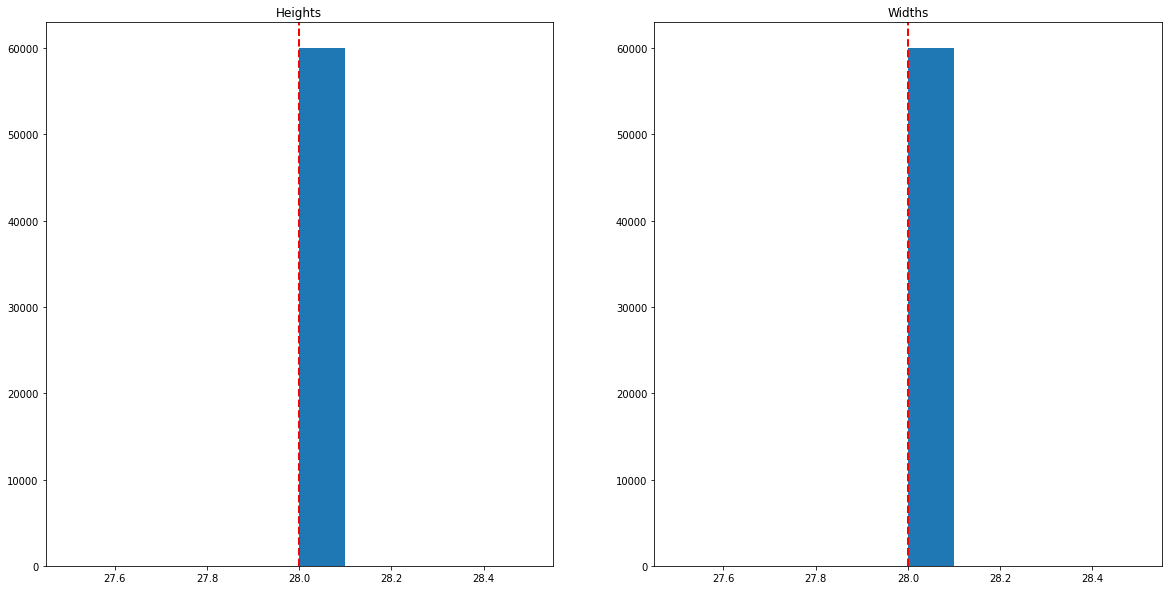

In [95]:
plt.figure(figsize=(20, 10))

plt.subplot(121)
plt.hist(heights)
plt.title('Heights')
plt.axvline(np.mean(heights), color='r', linestyle='dashed', linewidth=2)

plt.subplot(122)
plt.hist(widths)
plt.title('Widths')
plt.axvline(np.mean(widths), color='r', linestyle='dashed', linewidth=2)


plt.show()